In [466]:
#Housing prices regression dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline

warnings.filterwarnings("ignore", category=DeprecationWarning)
#Let's take the train dataset in df_train 
df_train = pd.read_csv('C://Users/Harsha/Desktop/Data Analysis/train.csv')


In [467]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

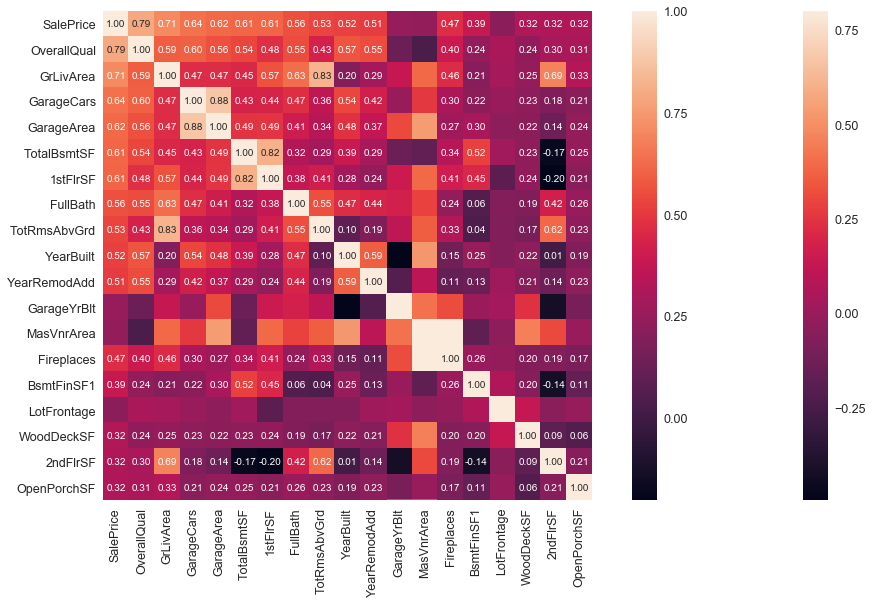

In [468]:
#To see how things are working let's see our correlation map
correlation = df_train.corr()
f, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(correlation, vmax=.8, square=True)
#saleprice correlation matrix
k = 19 #number of variables for heatmap
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [469]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

               Total   Percent
PoolQC          1453  0.995205
MiscFeature     1406  0.963014
Alley           1369  0.937671
Fence           1179  0.807534
FireplaceQu      690  0.472603
LotFrontage      259  0.177397
GarageCond        81  0.055479
GarageType        81  0.055479
GarageYrBlt       81  0.055479
GarageFinish      81  0.055479
GarageQual        81  0.055479
BsmtExposure      38  0.026027
BsmtFinType2      38  0.026027
BsmtFinType1      37  0.025342
BsmtCond          37  0.025342
BsmtQual          37  0.025342
MasVnrArea         8  0.005479
MasVnrType         8  0.005479
Electrical         1  0.000685
Utilities          0  0.000000
YearRemodAdd       0  0.000000
MSSubClass         0  0.000000
Foundation         0  0.000000
ExterCond          0  0.000000
ExterQual          0  0.000000
Exterior2nd        0  0.000000
Exterior1st        0  0.000000
RoofMatl           0  0.000000
RoofStyle          0  0.000000
YearBuilt          0  0.000000
...              ...       ...
GarageAr

In [470]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 100]).index,1)
#df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
print(df_train.describe())
print(df_train.dtypes)

                Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000

In [471]:

from sklearn import preprocessing
names=df_train.dtypes==object
list1=[]
tl=names.keys()

for i in tl:
    if names[i]==True:
        list1.append(i)
print(list1)

for col in list1:
    df_train[col].fillna(np.nan,inplace=True)
    lbl=preprocessing.LabelEncoder()
    lbl.fit(list(df_train[col].values))
    df_train[col]=lbl.transform(list(df_train[col].values))

print(df_train.dtypes)
print(df_train['SalePrice'])

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Id                 int64
MSSubClass         int64
MSZoning           int64
LotArea            int64
Street             int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
Roo

In [472]:
from sklearn.preprocessing import Imputer
df_train['GarageCond'].fillna(df_train['GarageCond'].median(),inplace=True)
df_train['GarageType'].fillna(df_train['GarageType'].median(),inplace=True)
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(),inplace=True)
df_train['GarageFinish'].fillna(df_train['GarageFinish'].median(),inplace=True)
df_train['GarageQual'].fillna(df_train['GarageQual'].median(),inplace=True)
df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].median(),inplace=True)
df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].median(),inplace=True)
df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].median(),inplace=True)
df_train['BsmtCond'].fillna(df_train['BsmtCond'].median(),inplace=True)
df_train['BsmtQual'].fillna(df_train['BsmtQual'].median(),inplace=True)
df_train['MasVnrType'].fillna(df_train['MasVnrType'].median(),inplace=True)
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median(),inplace=True)
print(df_train)

        Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
0        1          60         3     8450       1         3            3   
1        2          20         3     9600       1         3            3   
2        3          60         3    11250       1         0            3   
3        4          70         3     9550       1         0            3   
4        5          60         3    14260       1         0            3   
5        6          50         3    14115       1         0            3   
6        7          20         3    10084       1         3            3   
7        8          60         3    10382       1         0            3   
8        9          50         4     6120       1         3            3   
9       10         190         3     7420       1         3            3   
10      11          20         3    11200       1         3            3   
11      12          60         3    11924       1         0            3   
12      13  

[1460 rows x 75 columns]


In [473]:
#df_train.isnull().sum().max()
df_test = pd.read_csv('C://Users/Harsha/Desktop/Data Analysis/test.csv')
#print(df_test)
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
arr5=(missing_data['Total']>100)
t=arr5.keys()
list2=[]
for i in t:
    if arr5[i]==True:
        list2.append(i)
print(list2)
del df_test['Alley']
del df_test['Fence']
del df_test['FireplaceQu']
del df_test['LotFrontage']
del df_test['MiscFeature']
del df_test['PoolQC']


total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)
print(df_test.dtypes)

['Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'MiscFeature', 'PoolQC']
               Total   Percent
1stFlrSF         0.0  0.000000
2ndFlrSF         0.0  0.000000
3SsnPorch        0.0  0.000000
BedroomAbvGr     0.0  0.000000
BldgType         0.0  0.000000
BsmtCond        45.0  0.030822
BsmtExposure    44.0  0.030137
BsmtFinSF1       1.0  0.000685
BsmtFinSF2       1.0  0.000685
BsmtFinType1    42.0  0.028767
BsmtFinType2    42.0  0.028767
BsmtFullBath     2.0  0.001370
BsmtHalfBath     2.0  0.001370
BsmtQual        44.0  0.030137
BsmtUnfSF        1.0  0.000685
CentralAir       0.0  0.000000
Condition1       0.0  0.000000
Condition2       0.0  0.000000
Electrical       0.0  0.000000
EnclosedPorch    0.0  0.000000
ExterCond        0.0  0.000000
ExterQual        0.0  0.000000
Exterior1st      1.0  0.000685
Exterior2nd      1.0  0.000685
Fireplaces       0.0  0.000000
Foundation       0.0  0.000000
FullBath         0.0  0.000000
Functional       2.0  0.001370
GarageArea       1.0  0.000

In [474]:
names=df_test.dtypes==object
list3=[]
ta=names.keys()

for i in ta:
    if names[i]==True:
        list3.append(i)
print(list3)

for col in list3:
    df_test[col].fillna(np.nan,inplace=True)
    lbl=preprocessing.LabelEncoder()
    lbl.fit(list(df_test[col].values))
    df_test[col]=lbl.transform(list(df_test[col].values))

print(df_test.dtypes)
print(df_train['SalePrice'])

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Id                 int64
MSSubClass         int64
MSZoning           int64
LotArea            int64
Street             int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
Roo

In [475]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
arr6=(missing_data['Total']>0)
print(arr6)
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median(),inplace=True)
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].median(),inplace=True)
df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].median(),inplace=True)
df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].median(),inplace=True)
df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].median(),inplace=True)
df_test['GarageArea'].fillna(df_test['GarageArea'].median(),inplace=True)
df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].median(),inplace=True)
df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].median(),inplace=True)
df_test['GarageCars'].fillna(df_test['GarageCars'].median(),inplace=True)
df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].median(),inplace=True)

1stFlrSF         False
2ndFlrSF         False
3SsnPorch        False
BedroomAbvGr     False
BldgType         False
BsmtCond         False
BsmtExposure     False
BsmtFinSF1        True
BsmtFinSF2        True
BsmtFinType1     False
BsmtFinType2     False
BsmtFullBath      True
BsmtHalfBath      True
BsmtQual         False
BsmtUnfSF         True
CentralAir       False
Condition1       False
Condition2       False
Electrical       False
EnclosedPorch    False
ExterCond        False
ExterQual        False
Exterior1st      False
Exterior2nd      False
Fireplaces       False
Foundation       False
FullBath         False
Functional       False
GarageArea        True
GarageCars        True
                 ...  
LotArea          False
LotConfig        False
LotShape         False
LowQualFinSF     False
MSSubClass       False
MSZoning         False
MasVnrArea        True
MasVnrType       False
MiscVal          False
MoSold           False
Neighborhood     False
OpenPorchSF      False
OverallCond

In [476]:
from sklearn.model_selection import train_test_split
#df_test = pd.read_csv('C://Users/Harsha/Desktop/Data Analysis/test.csv')
y=df_train['SalePrice']
data=df_train
del data['SalePrice']
X=data
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor(n_estimators=4000,learning_rate=0.1,max_depth=7)


reg1.fit(X,y)
prediction1 = reg1.predict(df_test)
print(prediction1)
#from sklearn.metrics import r2_score
#print(r2_score(y_test,prediction1))


[ 126947.89574802  163573.78902332  189777.13988945 ...,  156785.13925952
  113186.68692161  212866.45816752]


In [477]:
import csv
with open('result1.csv',"w") as f:
    writer = csv.writer(f)
    ps = ['Id','SalePrice']
    writer.writerow(ps)
    
    x=1461
    for row in prediction1:
        writer.writerow([x,row])
        x+=1

In [478]:
"""
from sklearn.tree import DecisionTreeRegressor
reg2 = DecisionTreeRegressor(max_depth=10)


reg2.fit(X_train,y_train)
prediction2 = reg1.predict(X_test)
#print(prediction1)
from sklearn.metrics import r2_score
print(r2_score(y_test,prediction2))
"""

'\nfrom sklearn.tree import DecisionTreeRegressor\nreg2 = DecisionTreeRegressor(max_depth=10)\n\n\nreg2.fit(X_train,y_train)\nprediction2 = reg1.predict(X_test)\n#print(prediction1)\nfrom sklearn.metrics import r2_score\nprint(r2_score(y_test,prediction2))\n'

In [479]:
#print(y_test)